# 1. 국적별/목적별 입국 현황 데이터 전처리

In [1]:
import pandas as pd

pd.read_excel('./files/kto_201901.xlsx')

,2019년 01월 외래객 입국-목적별/국적별,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,국적,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%)
1,아시아주,765082,10837,1423,14087,125521,916950,775023,18.3,83
2,일본,198805,2233,127,785,4576,206526,167083,23.6,18.7
3,대만,86393,74,22,180,1285,87954,75820,16,8
4,홍콩,34653,59,2,90,1092,35896,34671,3.5,3.2
...,...,...,...,...,...,...,...,...,...,...
67,교포,0,0,0,0,15526,15526,19196,-19.1,1.4
68,계,884293,13675,4439,15995,186401,1104803,NaN,NaN,NaN
69,전년동기,742732,14663,4126,13858,180657,956036,NaN,NaN,NaN
70,성장률(%),19.1,-6.7,7.6,15.4,3.2,15.6,NaN,NaN,NaN


In [2]:
pd.read_excel('./files/kto_201901.xlsx',
             header = 1,
             usecols= 'A:G',
             skipfooter= 4)

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526


In [3]:
df = pd.read_excel('./files/kto_201901.xlsx',
             header = 1,
             usecols= 'A:G',
             skipfooter= 4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [4]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [5]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


In [6]:
df.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [7]:
# 기준연월 컬럼 생성
df['기준연월'] = '2019-01'
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [8]:
df['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [10]:
# 대륙 목록 만들기
continients_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continients_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [14]:
df_country = df[df['국적'].isin(continients_list) == False]
df_country.head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준연월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01
6,말레이시아,19043,95,7,99,2821,22065,2019-01
7,필리핀,14279,211,161,184,15638,30473,2019-01
8,인도네시아,14183,136,38,187,4298,18842,2019-01
9,싱가포르,8372,94,8,48,1333,9855,2019-01
10,미얀마,1304,10,31,67,3877,5289,2019-01


In [15]:
df_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [16]:
# 인덱스 reset
df_country = df_country.reset_index(drop=True)
df_country.head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준연월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01
5,말레이시아,19043,95,7,99,2821,22065,2019-01
6,필리핀,14279,211,161,184,15638,30473,2019-01
7,인도네시아,14183,136,38,187,4298,18842,2019-01
8,싱가포르,8372,94,8,48,1333,9855,2019-01
9,미얀마,1304,10,31,67,3877,5289,2019-01


In [17]:
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [18]:
df_country['대륙'] = continents
df_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [21]:
# 관광객 비율(%) 컬럼
df_country['관광객비율(%)'] = round(df_country['관광']/df_country['계'] * 100, 1)
df_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [22]:
df_country.sort_values(by = '관광객비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [23]:
df_country.sort_values(by = '관광객비율(%)', ascending = True).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6


In [24]:
df_country.pivot_table(index = '대륙', values = '관광객비율(%)', aggfunc = 'mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


but 관광객 비율이 평균 * 100인데 aggfunc에서도 mean을 주어 평균의 평균 값이 되어 버림

In [25]:
df_country.pivot_table(index = '대륙', values = ['관광', '계', '관광객비율(%)'], aggfunc = 'mean')

,계,관광,관광객비율(%)
대륙,,,
교포,15526.000000,0.000000,0.000000
기타대륙,54.000000,33.000000,61.100000
아메리카,16184.200000,10996.400000,68.200000
아시아,36678.000000,30603.280000,59.624000
아프리카,1845.000000,568.000000,32.700000
오세아니아,5874.666667,5126.333333,84.833333
유럽,3045.130435,2073.086957,63.826087


In [27]:
temp = df_country.pivot_table(index = '대륙', values = ['관광', '계'], aggfunc = 'sum')
temp

,계,관광
대륙,,
교포,15526,0
기타대륙,54,33
아메리카,80921,54982
아시아,916950,765082
아프리카,3690,1136
오세아니아,17624,15379
유럽,70038,47681


In [28]:
temp['관광객비율(%)'] = round(temp['관광']/temp['계'] * 100, 1)

In [29]:
temp

,계,관광,관광객비율(%)
대륙,,,
교포,15526,0,0.0
기타대륙,54,33,61.1
아메리카,80921,54982,67.9
아시아,916950,765082,83.4
아프리카,3690,1136,30.8
오세아니아,17624,15379,87.3
유럽,70038,47681,68.1


In [30]:
df_country[df_country['국적'] == '우크라이나']

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%)
46,우크라이나,593,58,3,28,1580,2262,2019-01,유럽,26.2


In [32]:
tourist_sum = df_country['관광'].sum()
tourist_sum

884293

In [34]:
df_country['전체비율(%)'] = round(df_country['관광']/tourist_sum * 100, 1)
df_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [35]:
df_country.sort_values(by = '전체비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9


In [44]:
# 반복할 수 있는 함수 생성
def create_kto_data(yy, mm):
    # 불러올 파일 경로
    file_path = './files/kto_{}{}.xlsx'.format(yy,mm)
    
    # 파일 불러오기
    df = pd.read_excel(file_path, header = 1, usecols = 'A:G', skipfooter=4)
    
    # 기준연월
    df['기준연월'] = '{}-{}'.format(yy,mm)
    
    continients_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    df_country = df[df['국적'].isin(continients_list) == False]
    df_country = df_country.reset_index(drop=True)
    
    # 대륙 정보 컬럼 추가
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents
    
    # 국가별 관광객 비율(%)
    df_country['관광객비율(%)'] = round(df_country['관광']/df_country['계'] * 100, 1)
    
    # 전체 비율(%)
    tourist_sum = df_country['관광'].sum()
    df_country['전체비율(%)'] = round(df_country['관광']/tourist_sum * 100, 1)
    
    # 결과 출력
    return(df_country)

In [45]:
df_test = create_kto_data(2018, 11)
df_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
0,일본,293965,1810,159,514,3530,299978,2018-11,아시아,98.0,26.0
1,대만,86476,62,18,192,1417,88165,2018-11,아시아,98.1,7.6
2,홍콩,52721,51,2,141,875,53790,2018-11,아시아,98.0,4.7
3,마카오,3986,2,0,16,38,4042,2018-11,아시아,98.6,0.4
4,태국,41003,46,260,66,5606,46981,2018-11,아시아,87.3,3.6


## 1.1 반복문 작업

In [43]:
for yy in range(2010, 2021):
    for mm in range(1, 13):
        yymm = '{}{}'.format(yy, mm)
        print(yymm)

20101
20102
20103
20104
20105
20106
20107
20108
20109
201010
201011
201012
20111
20112
20113
20114
20115
20116
20117
20118
20119
201110
201111
201112
20121
20122
20123
20124
20125
20126
20127
20128
20129
201210
201211
201212
20131
20132
20133
20134
20135
20136
20137
20138
20139
201310
201311
201312
20141
20142
20143
20144
20145
20146
20147
20148
20149
201410
201411
201412
20151
20152
20153
20154
20155
20156
20157
20158
20159
201510
201511
201512
20161
20162
20163
20164
20165
20166
20167
20168
20169
201610
201611
201612
20171
20172
20173
20174
20175
20176
20177
20178
20179
201710
201711
201712
20181
20182
20183
20184
20185
20186
20187
20188
20189
201810
201811
201812
20191
20192
20193
20194
20195
20196
20197
20198
20199
201910
201911
201912
20201
20202
20203
20204
20205
20206
20207
20208
20209
202010
202011
202012


In [46]:
# zfill()

mm = 1
print(str(mm).zfill(2))

01


In [48]:
for yy in range(2010, 2021):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2)
        yymm = '{}{}'.format(yy, mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


통합 데이터 생성

In [50]:
df = pd.DataFrame()

In [51]:
for yy in range(2010, 2021):
    for mm in range(1, 13):
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        df = df.append(temp, ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: './files/kto_202006.xlsx'

2020년 파일은 5월까지 밖에 없어서 데이터가 없어서 에러가 나기 때문에 이것을 try-except로 제외한다

In [52]:
df = pd.DataFrame()

for yy in range(2010, 2021):
    for mm in range(1, 13):
        try:        
            temp = create_kto_data(str(yy), str(mm).zfill(2))
            df = df.append(temp, ignore_index=True)
        except:
            pass

In [53]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [54]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0
7499,교포,0,0,0,0,790,790,2020-05,교포,0.0,0.0


In [56]:
df.to_excel('./files/kto_total.xlsx', index=False)

In [57]:
# 국가별 excel 저장하기
country_list = df['국적'].unique()
country_list

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [59]:
for country in country_list:
    df_country = df[df['국적'] == country]
    
    file_path = './files/[국적별 관광객 데이터] {}.xlsx'.format(country)
    
    df_country.to_excel(file_path, index=False)

# 2. 데이터 시각화 하기

In [60]:
df = pd.read_excel('./files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [62]:
from matplotlib import font_manager, rc
import platform

In [72]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\WINDOWS\\Fonts\\FRAHV.TTF',
 'C:\\WINDOWS\\Fonts\\LBRITEI.TTF',
 'C:\\Windows\\Fonts\\arial.ttf',
 'C:\\Windows\\Fonts\\BOOKOSI.TTF',
 'C:\\WINDOWS\\Fonts\\Arvo-Regular.ttf',
 'C:\\Windows\\Fonts\\ARIALNB.TTF',
 'C:\\WINDOWS\\Fonts\\GLECB.TTF',
 'C:\\Windows\\Fonts\\ROCC____.TTF',
 'C:\\Windows\\Fonts\\corbelb.ttf',
 'C:\\Windows\\Fonts\\ITCEDSCR.TTF',
 'C:\\Windows\\Fonts\\TCCB____.TTF',
 'C:\\WINDOWS\\Fonts\\LFAXD.TTF',
 'C:\\WINDOWS\\Fonts\\HARNGTON.TTF',
 'C:\\WINDOWS\\Fonts\\cambria.ttc',
 'C:\\Windows\\Fonts\\ALGER.TTF',
 'C:\\WINDOWS\\Fonts\\MTCORSVA.TTF',
 'C:\\Windows\\Fonts\\cambriab.ttf',
 'C:\\WINDOWS\\Fonts\\DUBAI-BOLD.TTF',
 'C:\\WINDOWS\\Fonts\\DUBAI-MEDIUM.TTF',
 'C:\\Windows\\Fonts\\HTOWERT.TTF',
 'C:\\WINDOWS\\Fonts\\segoeui.ttf',
 'C:\\Windows\\Fonts\\CALISTB.TTF',
 'C:\\WINDOWS\\Fonts\\corbelli.ttf',
 'C:\\WINDOWS\\Fonts\\trebucbd.ttf',
 'C:\\Windows\\Fonts\\MAGNETOB.TTF',
 'C:\\WINDOWS\\Fonts\\GOTHICB.TTF',
 'C:\\WINDOWS\\Fonts\\Hancom Gothic Bold.ttf',
 'C:\

In [73]:
if platform.system() == 'Windows' : # forn Windows
    path = 'c:/Windows/Fonts/Hancom Gothic Regular.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
#     rc('font', family='NanumGothic')
elif platform.system() == 'Darwin' : # for Mac
    rc('font', family='AppleGothic')
else:
    print('Chech your OS system')

현재 내 노트북에는 malgum.ttg가 없음 ⇨ Hancom Gothic Regular.ttf로 대체

## 2.1 시계열 그래프 그리기

In [65]:
import matplotlib.pyplot as plt

In [66]:
# 중국 국적 데이터 필터링 하기
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


<function matplotlib.pyplot.show(close=None, block=None)>

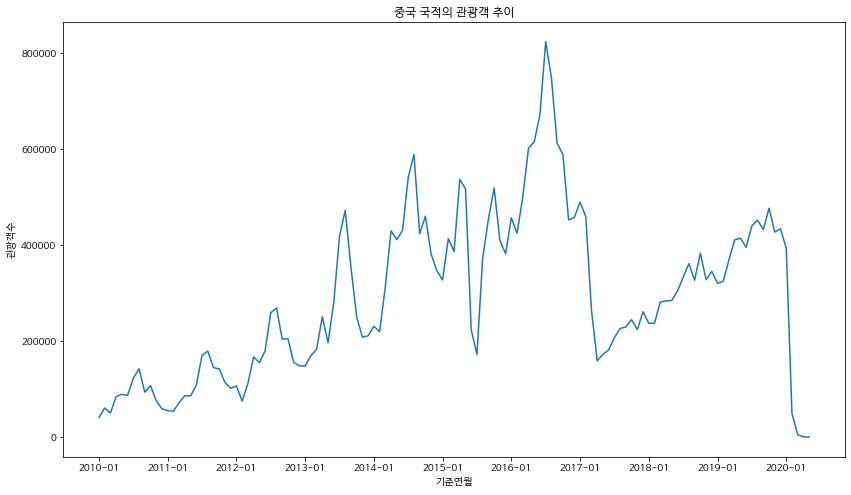

In [75]:
# 시계열 그래프 그리기

# 그래프 크기 조정
plt.figure(figsize = (14,8)) 

# 그래프 내용 설정
plt.plot(df_filter['기준연월'], df_filter['관광'])

# 그래프 타이틀, x,y 축 이름 달기
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준연월') # x축
plt.ylabel('관광객수') # y축

# x축눈금 값 설정 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

plt.show

In [76]:
# 예제 4-47 우리나라 방문하는 외국인 관광객 중 상위 5개 국가의 리스트 만들기
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

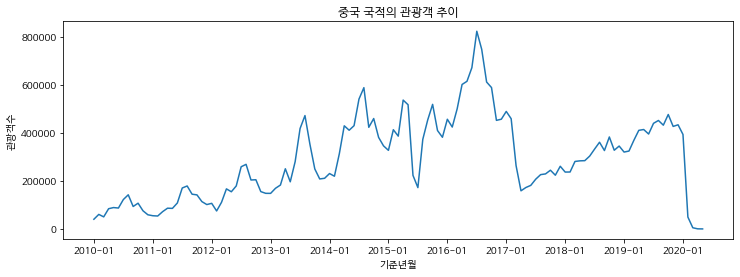

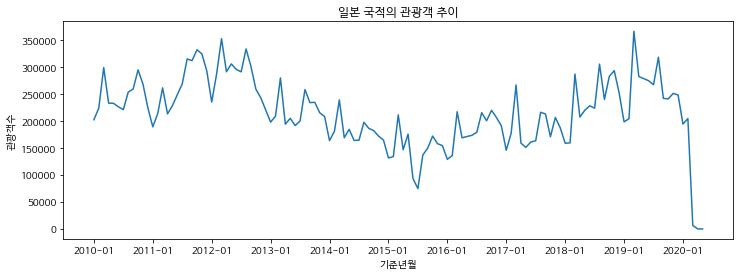

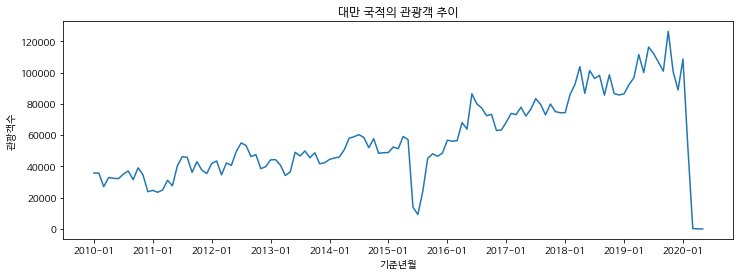

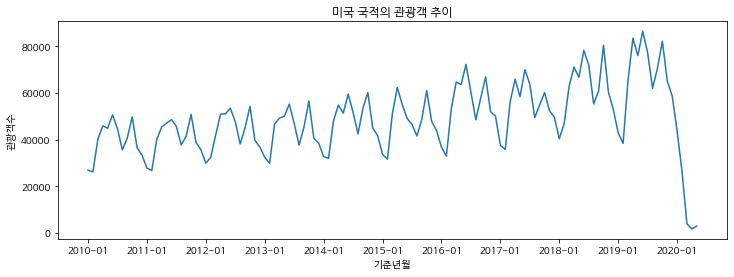

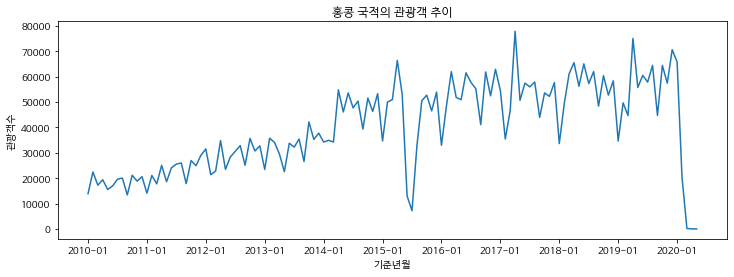

In [78]:
# 예제 4-48 반복문으로 여러 그래프 그리기 
for cntry in cntry_list: 
    # 국적 관광객만 추출 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    # 그래프 그리기 
    ## 그래프 크기 조절 
    plt.figure(figsize = (12, 4))
    
    ## 그래프 내용 설정 
    plt.plot(df_filter['기준연월'], df_filter['관광'])

    ## 그래프 타이틀, X축, Y축 이름 달기 
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    ## x 축 눈금 값 설정 
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

    ## 그래프 표현하기 
    plt.show()

## 2.2 히트맵 그리기

In [80]:
# 데이터 살펴보기
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [85]:
print(df['기준연월'].unique())

['2010-01' '2010-02' '2010-03' '2010-04' '2010-05' '2010-06' '2010-07'
 '2010-08' '2010-09' '2010-10' '2010-11' '2010-12' '2011-01' '2011-02'
 '2011-03' '2011-04' '2011-05' '2011-06' '2011-07' '2011-08' '2011-09'
 '2011-10' '2011-11' '2011-12' '2012-01' '2012-02' '2012-03' '2012-04'
 '2012-05' '2012-06' '2012-07' '2012-08' '2012-09' '2012-10' '2012-11'
 '2012-12' '2013-01' '2013-02' '2013-03' '2013-04' '2013-05' '2013-06'
 '2013-07' '2013-08' '2013-09' '2013-10' '2013-11' '2013-12' '2014-01'
 '2014-02' '2014-03' '2014-04' '2014-05' '2014-06' '2014-07' '2014-08'
 '2014-09' '2014-10' '2014-11' '2014-12' '2015-01' '2015-02' '2015-03'
 '2015-04' '2015-05' '2015-06' '2015-07' '2015-08' '2015-09' '2015-10'
 '2015-11' '2015-12' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05'
 '2016-06' '2016-07' '2016-08' '2016-09' '2016-10' '2016-11' '2016-12'
 '2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018

In [87]:
# str.slice() 함수를 이용해 연도, 월 컬럼 만들기 
df['년도'] = df['기준연월'].str.slice(0 ,4)
df['월'] = df['기준연월'].str.slice(5, 7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [95]:
# 예제 4-51 중국인 관광객 필터링
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [96]:
# 중국인 관광객 필터링 pivot_table 활용하기
df_pivot = df_filter.pivot_table(values = '관광', index = '년도', columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [97]:
# 히트맵 그래프 그리기에 필요한 라이브러리 import 
import seaborn as sns 

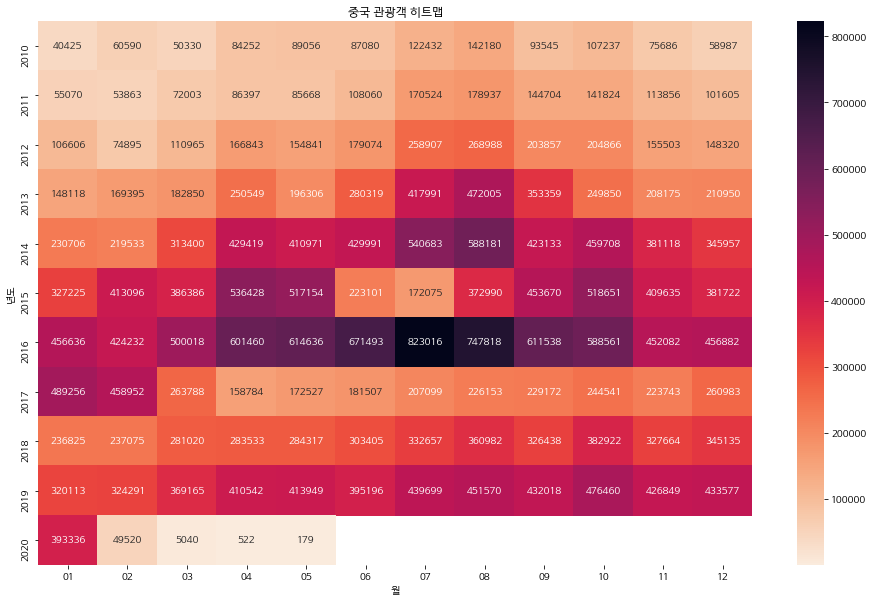

In [98]:
# 그래프 크기 설정 
plt.figure(figsize = (16, 10))

# 히트맵 그래프 그리기 
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r') # r: reverse
# sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r', linewidth=1, linecolor='black')

# 그래프 타이틀 달기 
plt.title('중국 관광객 히트맵')

# 그래프 표현 
plt.show()

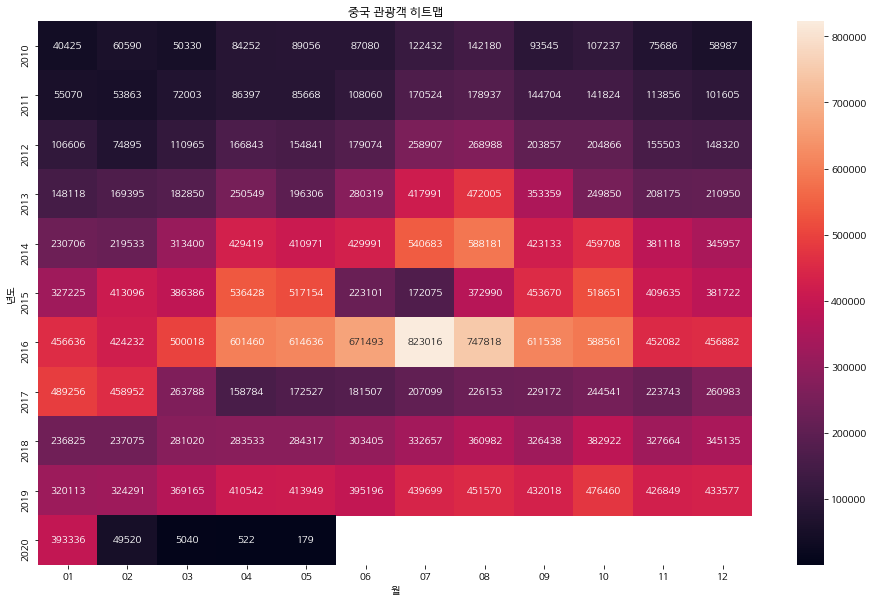

In [99]:
# 그래프 크기 설정 
plt.figure(figsize = (16, 10))

# 히트맵 그래프 그리기 
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket')
# sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r', linewidth=1, linecolor='black')

# 그래프 타이틀 달기 
plt.title('중국 관광객 히트맵')

# 그래프 표현 
plt.show()

In [103]:
cntry_list

['중국', '일본', '대만', '미국', '홍콩']

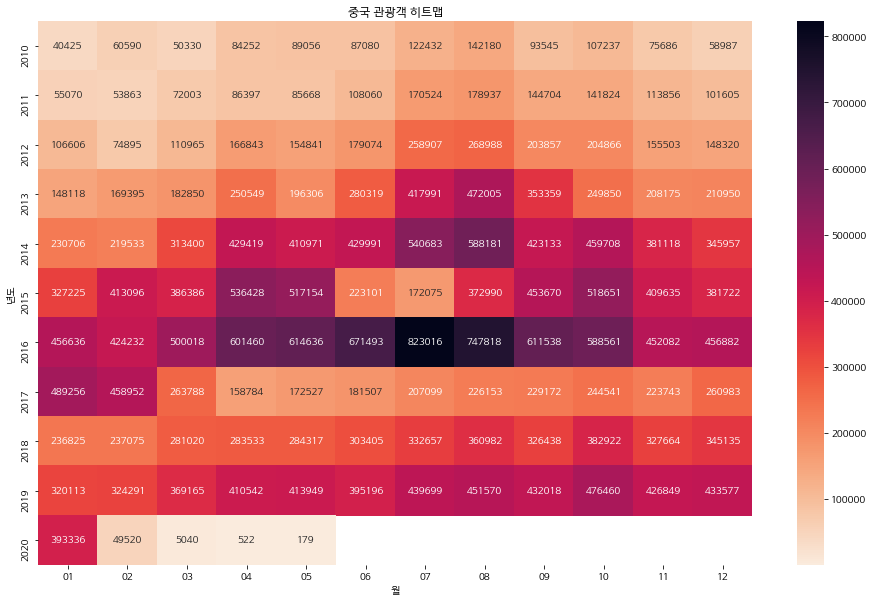

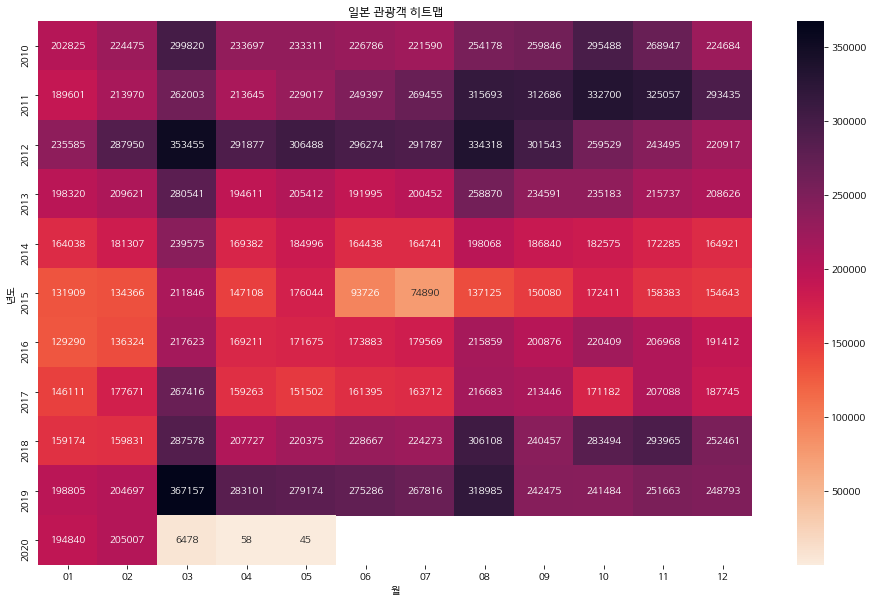

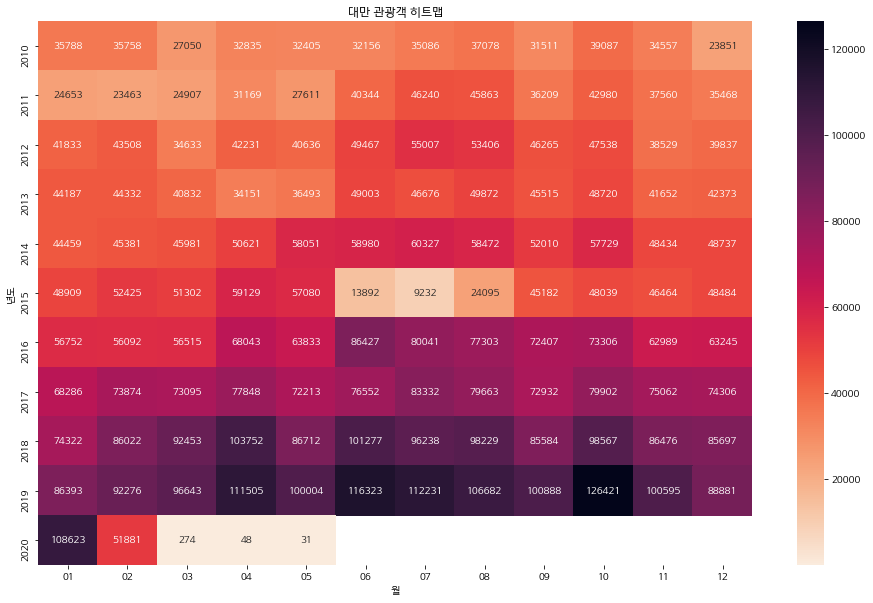

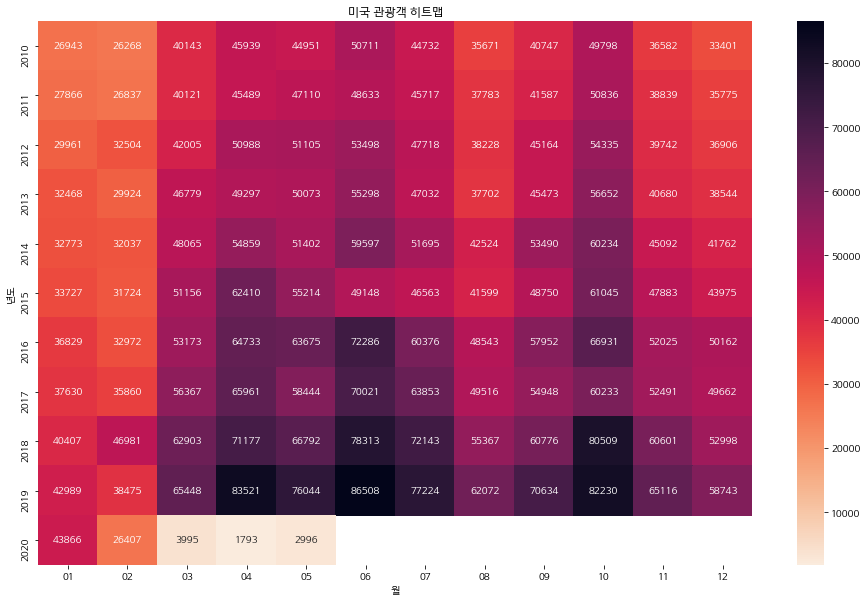

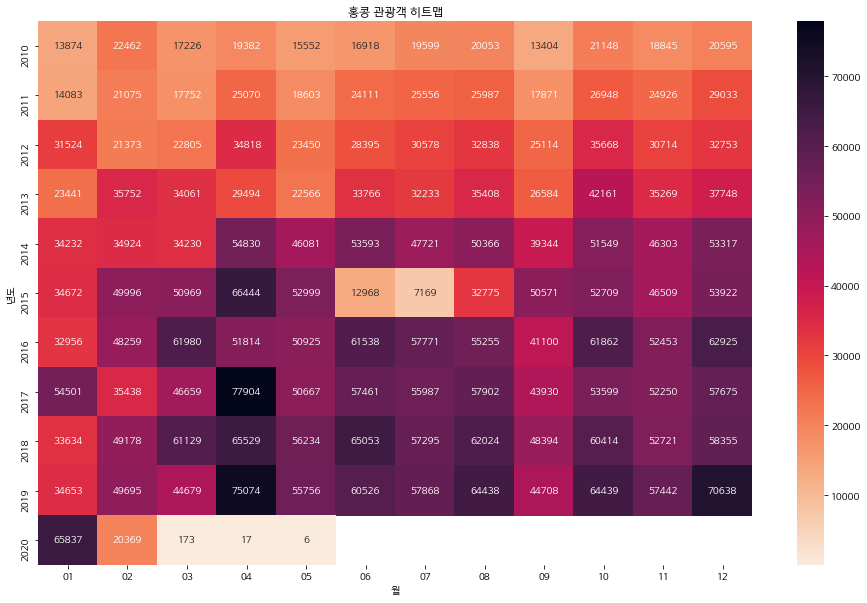

In [105]:
# 관광객 수가 가장 많은 상위 5개 국가 반복문으로 히트맵 그리기
for cntry in cntry_list:
    # 관광객 필터링
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    # pivot_table 활용하기
    df_pivot = df_filter.pivot_table(values = '관광', index = '년도', columns = '월')
    
    # 그래프 크기 설정 
    plt.figure(figsize = (16, 10))

    # 히트맵 그래프 그리기 
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r') # r: reverse
    
    # 그래프 타이틀 달기 
    plt.title('{} 관광객 히트맵'.format(cntry))

    # 그래프 표현 
    plt.show()

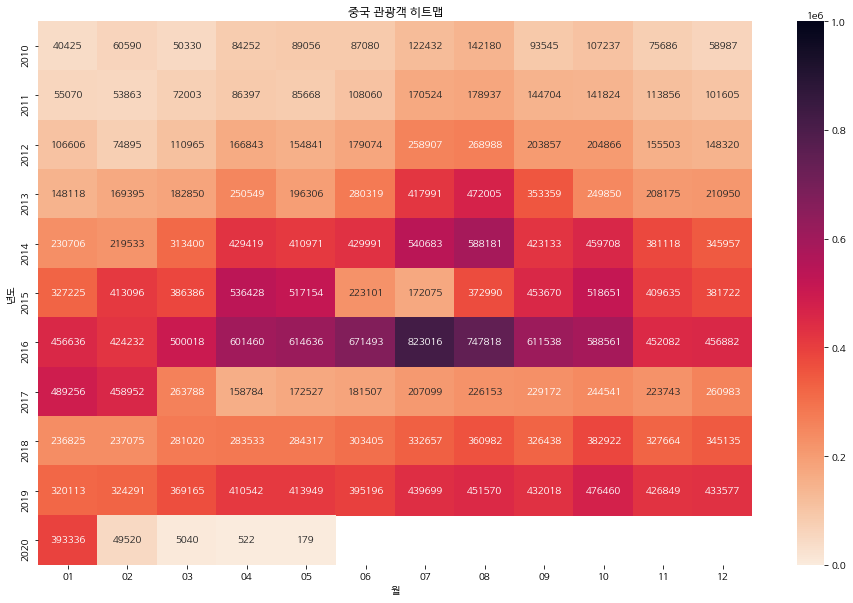

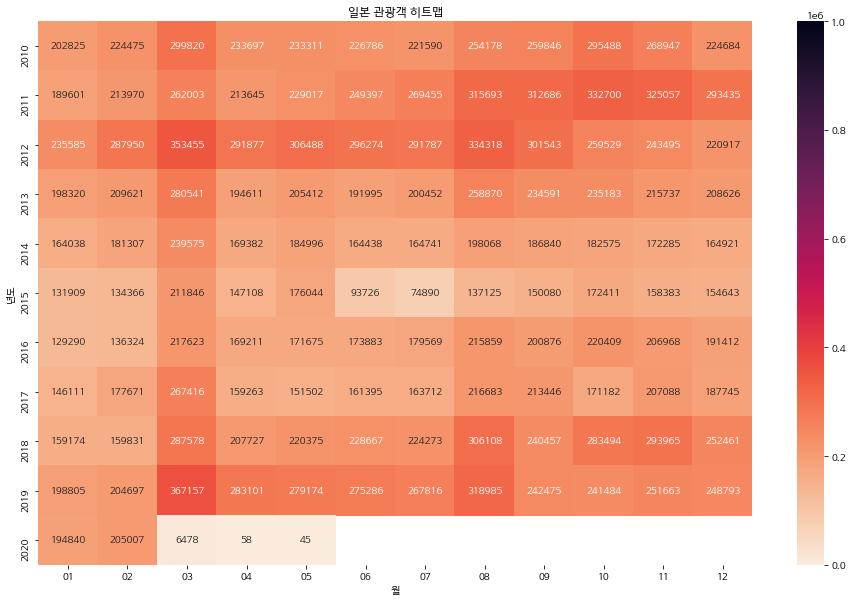

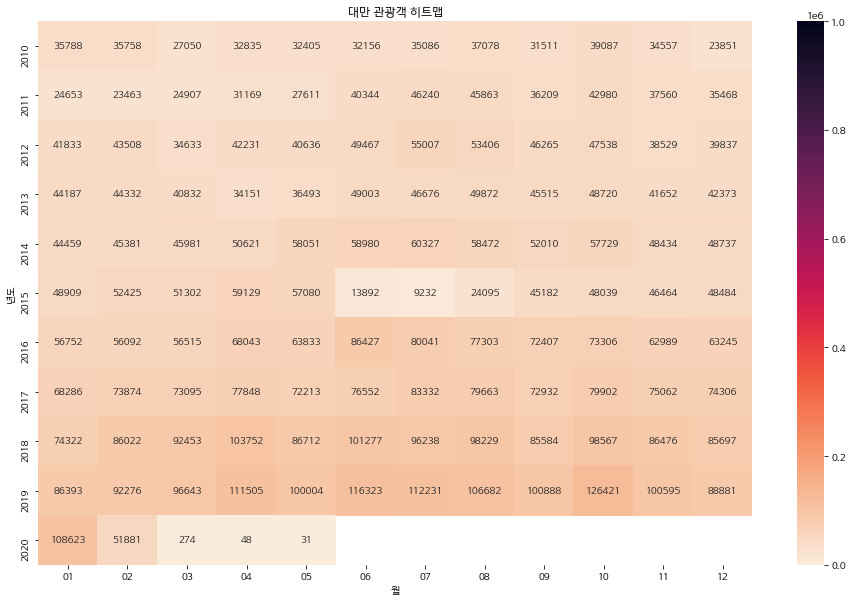

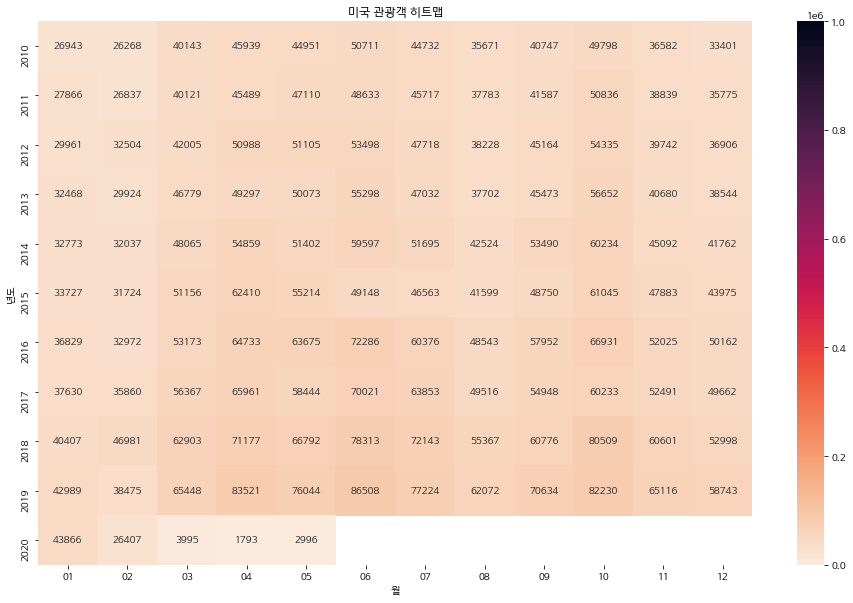

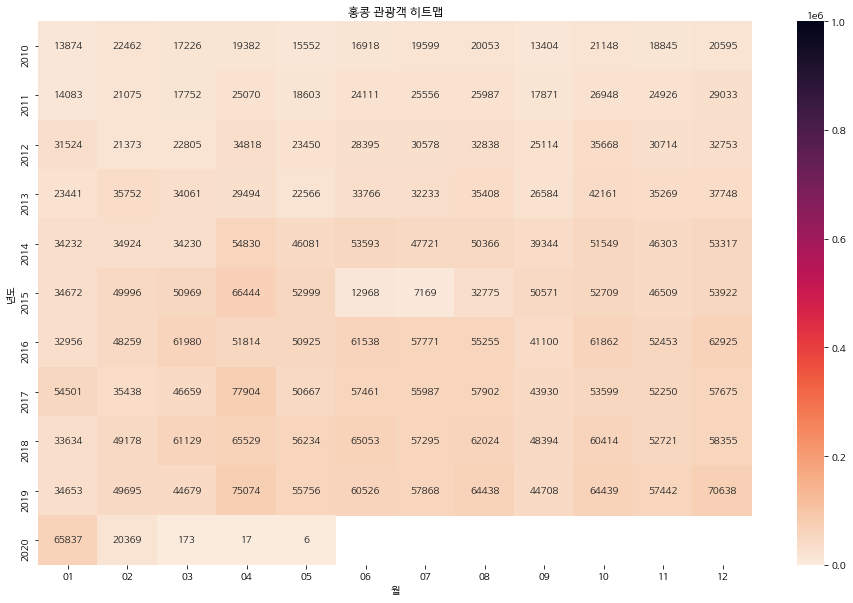

In [106]:
# 컬러바 기준 동일하게 만들기
# vmin, vmax

for cntry in cntry_list:
    # 관광객 필터링
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    # pivot_table 활용하기
    df_pivot = df_filter.pivot_table(values = '관광', index = '년도', columns = '월')
    
    # 그래프 크기 설정 
    plt.figure(figsize = (16, 10))

    # 히트맵 그래프 그리기 
    sns.heatmap(df_pivot, vmin = 0, vmax = 1000000, annot = True, fmt = '.0f', cmap = 'rocket_r') # r: reverse
    
    # 그래프 타이틀 달기 
    plt.title('{} 관광객 히트맵'.format(cntry))

    # 그래프 표현 
    plt.show()

퍼실님은 heatmap, boxplot 자주 이용하는 편